In [799]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [800]:
data = pd.read_csv('car_fuel_efficiency.csv')
data.shape

(9704, 11)

In [801]:
#Use only the following columns:
cols=['engine_displacement', 'horsepower','vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
target = 'fuel_efficiency_mpg'
df = data[cols]

df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

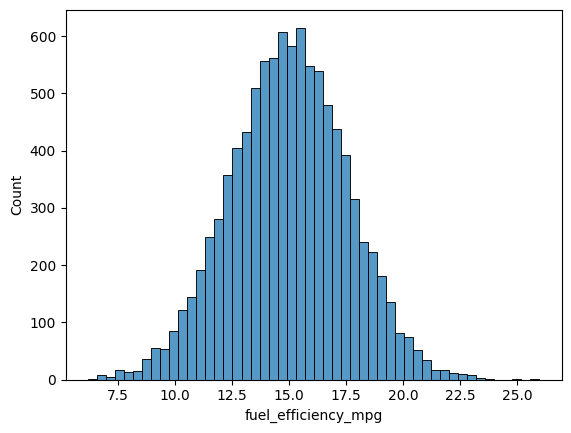

In [802]:
#Look at the fuel_efficiency_mpg variable. Does it have a long tail?
sns.histplot(df.fuel_efficiency_mpg  , bins= 50) #it has a normal distribution

In [803]:
#There's one column with missing values. What is it?
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'horsepower'

In [804]:
#What's the median (50% percentile) for variable 'horsepower'?
df.describe() 

# Answer = 149.000000

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


Prepare and split the dataset

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [805]:
#Shuffle the dataset (the filtered one you created above), use seed 42
n = len(df)
idx = np.arange(n) #create a number range of our dataset store as index
np.random.seed(42) #this will lock the random shuffle, instead of geting random values every time u ran a code
np.random.shuffle(idx)# shuffle the index we created

In [806]:
#Split your data in train/val/test sets, with 60%/20%/20% distribution

n_val = int(n * 0.2)                #20% of data for validation
n_test = int(n * 0.2)               #20% of data for testing.
n_train = n - n_val - n_test        #whatever is left for training (about 60%).

In [807]:
df_train = df.iloc[: n_train ] #take rows from start (0) up to n_train (exclusive). That’s the first 60% of the dataset.
df_val = df.iloc[n_train : n_train + n_val] #Starts at n_train (where training stopped).Goes up to n_train + n_val.That’s the next 20% of the dataset           
df_test = df.iloc[n_train + n_val : ] #Starts where validation stopped (n_train + n_val). Goes until the end of the DataFrame.That’s the last 20% of the dataset 
     

In [808]:
features = ['engine_displacement', 'horsepower','vehicle_weight', 'model_year']
target ='fuel_efficiency_mpg'

In [809]:
X_train = df_train[features].copy()
y_train = df_train[target]

X_val = df_val[features].copy()
y_val = df_val[target]

Question 3

We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?



OPTION 1: Fill missing with 0

In [810]:
def train_linear_regression(X, y):
    pass

In [811]:
# We need to deal with missing values for the column from Q1
# OPTION 1: Fill missing with 0

X_train_0 = X_train.fillna(0).values
X_val_0 = X_val.fillna(0).values


X = X_train_0
X

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [812]:
#Training data
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


train_linear_regression(X, y)

(np.float64(28.261658910234715),
 array([ 9.11044797e-05,  3.50896580e-03, -5.01858541e-03,  6.36493013e-04]))

Evaluation

In [813]:
# validation data
y_val = df_val['fuel_efficiency_mpg'].fillna(0).values
X_val_0 = df_val[features].values


w0, w = train_linear_regression(X_train_0, y_train)
y_pred_0 = w0 + X_val.dot(w)

rsme

In [814]:
def rmse_0(y, y_pred_0): #root mean square error btw actual price and predicted price
    error = y - y_pred_0 # the diff betwn actual price and pred
    se = error ** 2 #square the diff
    mse = se.mean() #find the avg of the squared diff
    return np.sqrt(mse) # return the squareroot of the avg squared diff


rmse_score = rmse_0(y_val, y_pred_0)
round(rmse_score, 2)

np.float64(0.5)

OPTION 2: Fill missing with MEAN (from TRAIN only)

In [815]:
def train_linear_regression(X, y):
    pass

In [816]:
# OPTION 2: Fill missing with mean
X_train_m = X_train.fillna(X_train.mean()).values
X_val_m = X_train.fillna(X_train.mean()).values
X = X_train_m
X

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [817]:
# Training data

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


train_linear_regression(X, y)

(np.float64(28.062372327469035),
 array([ 0.00018248,  0.01008237, -0.00500803,  0.00020222]))

Evaluation

In [818]:
# validation data
y_val = df_val['fuel_efficiency_mpg'].fillna(0).values
X_val_m = df_val[features].values


w0, w = train_linear_regression(X_train_m, y_train)
y_pred_m = w0 + X_val.dot(w)


RMSE

In [819]:
def rmse_m(y, y_pred): #root mean square error btw actual price and predicted price
    error = y - y_pred # the diff betwn actual price and pred
    se = error ** 2 #square the diff
    mse = se.mean() #find the avg of the squared diff
    return np.sqrt(mse) # return the squareroot of the avg squared diff


rmse_score = rmse_m(y_val, y_pred_m)
round(rmse_score, 2)

np.float64(0.45)

Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r

In [820]:
from sklearn.linear_model import Ridge, Lasso

In [821]:
#For this question, fill the NAs with 0

X_train_r = X_train.fillna(0).values
X_val_r = X_val.fillna(0).values


X = X_train_r
X

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [822]:
r_values= [0, 0.01, 0.1, 1, 5, 10, 100]

regularized linear regression RIDGE 

In [823]:
ridge = Ridge(alpha = 0.01) #alpha is the regularisation strength
ridge.fit(X_train_r, y_train)
y_pred_r = ridge.predict(X_val_r)

y_pred_r

array([14.26996143, 12.9551989 , 11.05787674, ..., 14.06137082,
        9.23119702, 21.19821448], shape=(1940,))

In [824]:
# validation data
y_val = df_val['fuel_efficiency_mpg'].fillna(0).values
X_val_r = df_val[features].values


w0, w = train_linear_regression(X_train_r, y_train)
y_pred_r = w0 + X_val.dot(w)

In [825]:
def rmse_0(y, y_pred): #root mean square error btw actual price and predicted price
    error = y - y_pred # the diff betwn actual price and pred
    se = error ** 2 #square the diff
    mse = se.mean() #find the avg of the squared diff
    return np.sqrt(mse) # return the squareroot of the avg squared diff


rmse_score = rmse_0(y_val, y_pred_r)
round(rmse_score, 2)

np.float64(0.5)

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [826]:
# Create an empty list to store RMSE for each seed
rmse_scores = []

In [827]:
# Try different random seeds from 0 to 9
for seed in range(10):
    n_ = len(df)
    idx = np.arange(n_)
    np.random.seed(seed)
    np.random.shuffle(idx)

    n_val_ = int(n_ * 0.2)
    n_test_ = int(n_ * 0.2)
    n_train_ = n_ - n_val_ - n_test_
    
    df_train_ = df.iloc[:n_train_]
    df_val_ = df.iloc[n_train_:n_train_ + n_val_]
    df_test_ = df.iloc[n_train_ + n_val_:]
    
    features_ = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    target_ = 'fuel_efficiency_mpg'
    
    X_train_ = df_train_[features_].copy()
    y_train_ = df_train_[target_].copy()
    X_val_ = df_val_[features_].copy()
    y_val_ = df_val_[target_].copy()
    
        # Fill missing values with 0
    X_train_ = X_train_.fillna(0).values
    X_val_ = X_val_.fillna(0).values
    y_train_ = y_train_.fillna(0).values
    y_val_ = y_val_.fillna(0).values

    # Train linear regression (no regularization)
    def train_linear_regression_(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w_full = XTX_inv.dot(X.T).dot(y)
        return w_full[0], w_full[1:]

    
    w0, w = train_linear_regression_(X_train_, y_train_)
    
        # Predict on validation set
    ones = np.ones(X_val_.shape[0])
    X_val_ext = np.column_stack([ones, X_val_])
    y_pred_ = X_val_ext.dot(np.concatenate(([w0], w)))


    # RMSE function
    def rmse_(y, y_pred_):
        error = y - y_pred_
        se = error ** 2
        mse = se.mean()
        return np.sqrt(mse)


    rmse_score = rmse_(y_val_, y_pred_)
    rmse_scores.append(rmse_score)


# After the loop — compute standard deviation of all RMSE scores
std_ = np.std(rmse_scores)
print("RMSE scores:", [round(r, 2) for r in rmse_scores])
print("Standard deviation:", round(std_, 3))



RMSE scores: [np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.52)]
Standard deviation: 0.0


Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [828]:
#Shuffle the dataset (the filtered one you created above), use seed 42
n = len(df)
idx = np.arange(n)
np.random.seed(9) 
np.random.shuffle(idx)

In [829]:
X_train_ = df_train_[features_].copy()
y_train_ = df_train_[target_].copy()
X_val_ = df_val_[features_].copy()
y_val_ = df_val_[target_].copy()

In [830]:
# Fill missing values with 0
X_train_ = X_train_.fillna(0).values
X_val_ = X_val_.fillna(0).values
y_train_ = y_train_.fillna(0).values
y_val_ = y_val_.fillna(0).values

In [831]:
 # Train linear regression (no regularization)
def train_linear_regression_(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [832]:
train_linear_regression_(X_train_, y_train_)

(np.float64(28.261658910234715),
 array([ 9.11044797e-05,  3.50896580e-03, -5.01858541e-03,  6.36493013e-04]))

In [833]:
X_train_ = X_train.fillna(0).values
X_val_ = X_val.fillna(0).values


X = X_train_
X

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [834]:
ridge = Ridge(alpha = 0.001) #alpha is the regularisation strength
ridge.fit(X_train_, y_train)
y_pred_ = ridge.predict(X_val_)

y_pred_

array([14.26996143, 12.9551989 , 11.05787674, ..., 14.06137082,
        9.23119702, 21.19821448], shape=(1940,))

In [835]:
     # Predict on validation set
# validation data
y_val_ = df_val['fuel_efficiency_mpg'].fillna(0).values
X_val_ = df_val[features].values


w0, w = train_linear_regression(X_train_, y_train)
y_pred_ = w0 + X_val.dot(w)

In [836]:
def rmse_(y, y_pred): 
    error = y - y_pred 
    se = error ** 2 
    mse = se.mean() 
    return np.sqrt(mse) 


rmse_score = rmse_(y_val, y_pred_)
rmse_score

np.float64(0.4956640440680746)